# HW3

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from sklearn.decomposition import FactorAnalysis
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS
from sklearn.preprocessing import scale
from IPython.display import Image

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Question 1: Factor Analysis

### (a) 
Obtain the principal component solution to the factor model X = μ + LF + ε with number of factors m = 1 and m = 2 using:
- (i) the sample covariance matrix
- (ii) the sample correlation matrix.

In other words, you should find the matrix factor loadings L ∈ Rn×m, the specific variances ψ1, . . . , ψp ∈ R, and write down the proportions of variability (in percentages) due to the factors.

In [2]:
col = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']
data = pd.read_table('http://www.stat.uchicago.edu/~lekheng/courses/331/hw3/p1.txt',\
                     sep = '  ', names = col, usecols = [0, 1, 4, 5])

In [3]:
x = np.matrix(data).T
x_cov = np.cov(x)
x_cor = np.corrcoef(x)

In [4]:
def factor_analysis(matrix, m):
    U, s, V = np.linalg.svd(matrix, full_matrices=True)
    L = [np.dot(U[:, i], np.sqrt(s[i])) for i in range(m)]
    L = np.matrix(L).T
    PSI = np.diag(matrix - np.dot(L, L.T))
    proportion_of_var = sum(s[:m])/sum(s)
    print('The matrix factor loadings are:\n', L)
    print('\nThe specific variances are:\n', PSI)
    print('\nThe the proportion of variability due to the factors are:\n', format(proportion_of_var, '.2f'))
    return (L, PSI, proportion_of_var)

(i) sample covariance matrix

In [5]:
# m = 1
L_1, PSI_1, proportion_of_var_1 = factor_analysis(x_cov, 1)

The matrix factor loadings are:
 [[  0.23076099]
 [-17.28504461]
 [ -0.49563311]
 [ -2.04321236]]

The specific variances are:
 [  2.44674937   0.39564171  11.11787859  26.27824491]

The the proportion of variability due to the factors are:
 0.88


In [6]:
# m = 2
L_2, PSI_2, proportion_of_var_2  = factor_analysis(x_cov, 2)

The matrix factor loadings are:
 [[  0.23076099  -0.34631182]
 [-17.28504461  -0.62751   ]
 [ -0.49563311   0.67304777]
 [ -2.04321236   5.10619377]]

The specific variances are:
 [  2.32681749e+00   1.87291224e-03   1.06648853e+01   2.05030070e-01]

The the proportion of variability due to the factors are:
 0.96


(ii) the sample correlation matrix.

In [7]:
# m = 1
L_3, PSI_3, proportion_of_var_3  = factor_analysis(x_cor, 1)

The matrix factor loadings are:
 [[-0.55838924]
 [ 0.68401053]
 [ 0.47839373]
 [ 0.75615704]]

The specific variances are:
 [ 0.68820146  0.5321296   0.77113944  0.42822653]

The the proportion of variability due to the factors are:
 0.40


In [8]:
# m = 2
L_4, PSI_4, proportion_of_var_4  = factor_analysis(x_cor, 2)

The matrix factor loadings are:
 [[-0.55838924  0.27698805]
 [ 0.68401053 -0.16976227]
 [ 0.47839373  0.87152952]
 [ 0.75615704 -0.19327723]]

The specific variances are:
 [ 0.61147908  0.50331037  0.01157573  0.39087044]

The the proportion of variability due to the factors are:
 0.62


### (b) 
Find the angle between the first factor loading in (i) and that the first factor loading in (ii).

In [9]:
cos = np.dot(np.squeeze(L_1), L_3)/(np.linalg.norm(L_1)*np.linalg.norm(L_3))
angle = np.degrees(np.arccos(cos))

In [10]:
180- angle

matrix([[ 51.14273535]])

### (c) 
For the m = 2 case, compare the factor loadings obtained in (i) and that in (ii) using
orthogonal Procrustes analysis.

In [15]:
M = np.dot(L_4.T, L_2)

In [16]:
U, s, V = np.linalg.svd(M, full_matrices=True)

In [17]:
R = np.dot(U, V.T)

According to orthogonal Procrustes analysis, the orthogonal matrix R that mostly closely maps L_4 to L_2 is:

In [18]:
R

matrix([[-0.99757205, -0.06964199],
        [-0.06964199,  0.99757205]])

### (d) 
Comment on your results:

As observed, variance explained using two factors with covariance matrix is 0.96, and with correlation matrix is only 0.62, which is similar to the situation that we observed with PCA before. Similarly, it's because that we did not standarized the data before we calculate the covariance matrix. 

We found that the angle between the first factor loading in (i) and the first factor loading in (ii) is about 51 degree.

We found that the orthogonal matrix is as shown above. 

## Question 2: Population Canonical Correlation Analysis

### (a) Calculate the canonical correlation ρ1 (the largest), ρ2 (the second largest).

In [101]:
m = [[8, 2], [2, 5]]
sigma_x = sp.linalg.fractional_matrix_power(m, -.5)

m = [[6, -2], [-2, 7]]

sigma_y = sp.linalg.fractional_matrix_power(m, -.5)

sigma_xy = [[3, 1], [-1, 3]]
gamma_xy = np.dot(np.dot(sigma_x, sigma_xy), sigma_y)

In [102]:
U, s, V = np.linalg.svd(gamma_xy, full_matrices=True)

In [103]:
print('Largest canonical correlation: '+ format(s[0], '.4f'))
print('Second largest canonical correlation: '+ format(s[1], '.4f'))

Largest canonical correlation: 0.5519
Second largest canonical correlation: 0.4899


### (b) Find the canonical correlation variables (U1,V1) and (U2,V2) corresponding to ρ1 and ρ2.

In [130]:
X = [-3, 2]
Y = [0, 1]

In [131]:
a_1 = np.dot(sigma_x, U[:, 0])
b_1 = np.dot(sigma_y, V.T[:, 0])

# a_1 = np.reshape(a_1, (2,1))
# b_1 = np.reshape(b_1, (2,1))

u_1 = np.dot(a_1.T, X)
v_1 = np.dot(b_1.T, Y)

In [132]:
a_1

array([-0.31682057,  0.36222686])

In [133]:
b_1

array([-0.36470579,  0.09506271])

In [134]:
u_1

1.6749154316486097

In [135]:
v_1

0.095062712121243134

In [136]:
# a = np.dot(np.dot(a_1.T, sigma_xy), b_1)
# b = np.dot(np.dot(a_1.T, [[8, 2], [2, 5]]), a_1)
# c = np.dot(np.dot(b_1.T, [[6, -2], [-2, 7]]), b_1)
# uv_corr_1 = a/(np.sqrt(b)*np.sqrt(c))
# uv_corr_1

In [137]:
a_2 = np.dot(sigma_x, U[:, 1])
b_2 = np.dot(sigma_y, V.T[:, 1])

u_2 = np.dot(a_2.T, X)
v_2 = np.dot(b_2.T, Y)

In [138]:
a_2

array([ 0.19624886,  0.30168514])

In [139]:
b_2

array([ 0.22627464,  0.38582097])

In [140]:
u_2

0.014623692451229298

In [141]:
v_2

0.38582096574221969

In [114]:
# a = np.dot(np.dot(a_2.T, sigma_xy), b_2)
# b = np.dot(np.dot(a_2.T, [[8, 2], [2, 5]]), a_2)
# c = np.dot(np.dot(b_2.T, [[6, -2], [-2, 7]]), b_2)
# uv_corr_2 = a/(np.sqrt(b)*np.sqrt(c))
# uv_corr_2

### (C)

In [142]:
expectation_uv = [u_1, u_2, v_1, v_2]

In [143]:
expectation_uv

[1.6749154316486097,
 0.014623692451229298,
 0.095062712121243134,
 0.38582096574221969]

In [149]:
a_12 = np.array([a_1, a_2])
b_12 = np.array([b_1, b_2])

In [150]:
sigma_uv = np.dot(np.dot(a_12.T, [[3,1], [-1, 3]]), b_12)
t1 = np.hstack([np.identity(2), sigma_uv])
t2 = np.hstack([sigma_uv, np.identity(2)])
Cov_UV = np.vstack([t1, t2])

In [155]:
Cov_UV 

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

### (d) Comment on the correlation structure between and within U and V .

Correlation between U1 and U2 is 0. Similarly, correlation between V1 and V2 is 0. Additionally, we observe correlation between U1 and V1 as 0.5519 and that between U2 and V2 as 0.4899, having the correlation between the first pair of canonical vairiables larger than the second pair.

## Question 3: Sample canonical correlation analysis

### (a) 
Perform a canonical correlation analysis of these data by computing the singular value decomposition of an appropriate matrix formed from the sample covariance matrices. You may compare your result with that obtained by your software (if you use R, it is cancor(X1,X2)).

In [31]:
col = 'shock, vibrate, static1, static2, distance'.split(', ')
data = pd.read_table('http://www.stat.uchicago.edu/~lekheng/courses/331/hw3/p3.txt', sep = '  ', names = col, header = None)

In [32]:
X = data.iloc[:, :2]
Y = data.iloc[:, 2:4]

In [52]:
def cca(X, Y, mode):
    if mode == 'cov':
        X_cov = np.cov(X.T)
        Y_cov = np.cov(Y.T)
        XY_cov = np.cov(X.T, Y.T)[:2, 2:]
    else:
        X_cov = np.corrcoef(X.T)
        Y_cov = np.corrcoef(Y.T)
        XY_cov = np.corrcoef(X.T, Y.T)[:2, 2:]
        
    x = sp.linalg.fractional_matrix_power(X_cov, -.5)
    y = sp.linalg.fractional_matrix_power(Y_cov, -.5)
    G_XY = np.dot(np.dot(x, XY_cov), y)
    U, s, V = np.linalg.svd(G_XY, full_matrices=True)

    # coefficients
    a_1 = np.dot(x, U[:, 0])
    b_1 = np.dot(y, V.T[:, 0])

    # correlation
    s

    # projected x,y
    u_1 = X.dot(a_1)
    v_1 = Y.dot(b_1)
    
    a_2 = np.dot(x, U[:, 1])
    b_2 = np.dot(y, V.T[:, 1])

    u_2 = X.dot(a_2)
    v_2 = Y.dot(b_2)
    
    return (s, a_1, b_1, u_1, v_1, a_2, b_2, u_2, v_2 )

In [34]:
s, a_1, b_1, u_1, v_1, a_2, b_2, u_2, v_2 = cca(X, Y, 'cov')

In [35]:
s

array([ 0.91913484,  0.07463327])

### (b)
Write the first canonical correlation variables U1 and V1 as linear combinations of shock, vibrate, static1, static2.

In [36]:
# i = 1
# u_1 = np.dot(np.dot(U[:, 0].T, x), X.T)
# v_1 = np.dot(np.dot(V.T[:, 0].T, x), X.T)

In [37]:
print('a_1', a_1)
print('b_1', b_1)
# a_1 = np.reshape(a_1, (2,1))
# b_1 = np.reshape(b_1, (2,1))

# u_1 = np.dot(a_1.T, X.T)
# v_1 = np.dot(b_1.T, Y.T)

a_1 [-0.00369591  0.00086616]
b_1 [-0.00163167 -0.00152456]


Thus, 
- the coefficient for `shock` is -0.00369591; 
- the coefficient for `vibrate` is 0.00086616; 
- the coefficient for `static1` is -0.00163167; 
- the coefficient for `static2` is -0.00152456

### (c) 
Produce two scatterplots of the data: one in the coordinate plane of the first canonical correlation vectors, one in the plane of the second canonical correlation vectors.

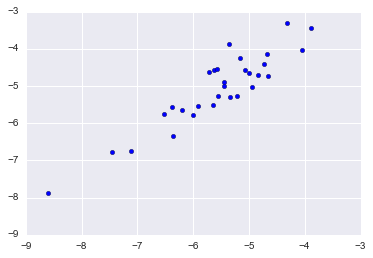

In [38]:
plt.scatter(u_1, v_1) # correlation: 0.91913484

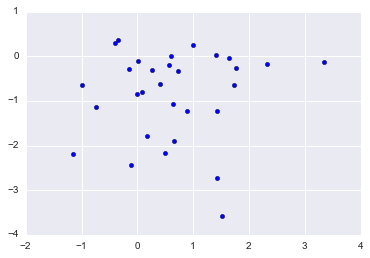

In [39]:
plt.scatter(u_2, v_2) # correlation: 0.07463327

### (d) 
Based on the two plots and the values of the canonical correlations {ρ1,ρ2}, comment on the correlation structure captured by each canonical pair.

Since the corrlations of first pair of canonical variables is the fist singular value, 0.919, and we could observe that there indeed is a strong correlation between them from the scatterplot. In contrast, there is only very weak correlation in the second plot, and it could be justified by the coefficient as low as 0.07463327.

### (e) 
Repeat (a) with sample correlation matrices in place of sample covariance matrices and verify that the pairs of canonical vectors obtained are related via scaling by the sample standard deviation matrix.

In [53]:
s_, a_1_, b_1_, u_1, v_1, a_2_, b_2_, u_2, v_2 = cca(X, Y, 'cor')

In [54]:
s_

array([ 0.91913484,  0.07463327])

In [55]:
print('a_1', a_1_)
print('b_1', b_1_)

a_1 [-1.26583641  0.29490251]
b_1 [-0.50902008 -0.50940343]


In [56]:
print('a_2', a_2_)
print('b_2', b_2_)

a_2 [-2.27461513  2.58635812]
b_2 [ 2.64065773 -2.64058381]


In [63]:
VX = sp.linalg.fractional_matrix_power(np.diag(np.var(X)), .5)
VY = sp.linalg.fractional_matrix_power(np.diag(np.var(Y)), .5)

In [64]:
VY

array([[ 306.72003883,    0.        ],
       [   0.        ,  328.515058  ]])

In [65]:
print('normalized a_1 with correlation matrix \n', \
      a_1_/np.linalg.norm(a_1_))

res_1 = VX.dot(a_1)
res_1 = res_1/np.linalg.norm(res_1)
print('normalized a_1 with covariance matrix scaled\
by standard deviation matrices \n', \
      res_1)

print('\nnormalized b_1 with correlation matrix \n', \
      b_1_/np.linalg.norm(b_1_))

res_1 = VY.dot(b_1)
res_1 = res_1/np.linalg.norm(res_1)
print('normalized b_1 with covariance matrix scaled\
by standard deviation matrices \n', \
      res_1)

normalized a_1 with correlation matrix 
 [-0.97391935  0.22689446]
normalized a_1 with covariance matrix scaledby standard deviation matrices 
 [-0.97391935  0.22689446]

normalized b_1 with correlation matrix 
 [-0.70684057 -0.7073729 ]
normalized b_1 with covariance matrix scaledby standard deviation matrices 
 [-0.70684057 -0.7073729 ]


In [66]:
print('normalized a_2 with correlation matrix \n', \
      a_2_/np.linalg.norm(a_2_))

res_2 = VX.dot(a_2)
res_2 = res_2/np.linalg.norm(res_2)
print('normalized a_2 with covariance matrix scaled \
by standard deviation matrices \n', \
      res_2)

print('\nnormalized b_2 with correlation matrix \n', \
      b_2_/np.linalg.norm(b_2_))

res_1 = VY.dot(b_2)
res_1 = res_1/np.linalg.norm(res_1)
print('normalized b_2 with covariance matrix scaled \
by standard deviation matrices \n', \
      res_1)

normalized a_2 with correlation matrix 
 [-0.66040206  0.75091219]
normalized a_2 with covariance matrix scaled by standard deviation matrices 
 [-0.66040206  0.75091219]

normalized b_2 with correlation matrix 
 [ 0.70711668 -0.70709688]
normalized b_2 with covariance matrix scaled by standard deviation matrices 
 [ 0.70711668 -0.70709688]


Thus, we've shown that if we use correlation matrix, the canonical vairables are scaled by the sample standard deviation matrix.

## Question 4: Canonical correlation analysis for angular measurements

### (a)

Compute sample mean x and sample covariance matrix. Is x a good estimator of μ? Why
or why not?


In [67]:
x_1 = [0.9, 0.6, 0.6, -0.9]
x_2 = [0, 0.6, -0.6, 0]
data = pd.DataFrame({'x1': x_1, 'x2': x_2})

In [68]:
# sample mean
x_bar = np.array(data.mean())
x_bar

array([ 0.3,  0. ])

In [69]:
# sample covariance matrix
np.cov(data.T)

array([[ 0.66,  0.  ],
       [ 0.  ,  0.24]])

Sample mean is note good estimator of true expectation in this case only because sample size is too small.

### (b), (c), (e) can be found in the written part

### (d)

In [161]:
R = [[1, 0.166, 0.694], [0.166, 1, -0.051], [0.694, -0.051, 1]]

In [164]:
S_xy = np.matrix([0.166, 0.694])
S_y = np.matrix([[1, -0.051], [-0.051, 1]])
G_xy = S_xy.dot(sp.linalg.fractional_matrix_power(S_y, -.5))
U, s, V = np.linalg.svd(G_xy, full_matrices=True)

In [165]:
print('Largest canonical correlation(rou_1) is', format(s[0], '.3f'))
print('V_1 is\n', V.T[:, 0])

Largest canonical correlation(rou_1) is 0.723
V_1 is
 [[-0.25444443]
 [-0.9670874 ]]


### (f)

In [19]:
S_x = np.matrix([[1, -0.291], [-0.291, 1]])
S_xy = np.matrix([[0.44, 0.372], [-0.205, 0.243]])
S_y = np.matrix([[1, 0.181], [0.181, 1]])
G_xy = sp.linalg.fractional_matrix_power(S_x, -.5).dot(S_xy).dot(sp.linalg.fractional_matrix_power(S_y, -.5))
U, s, V = np.linalg.svd(G_xy, full_matrices=True)

In [22]:
print('Largest canonical correlation(rou_1) is', format(s[0], '.3f'))
print('U_1 is\n', U[:, 0])
print('V_1 is\n', V.T[:, 0])

Largest canonical correlation(rou_1) is 0.567
U_1 is
 [[ 0.95343944]
 [ 0.30158453]]
V_1 is
 [[ 0.56289131]
 [ 0.82653093]]


## Question 6: Linear discriminant analysis
The admissions committee of a business school used GPA and GMAT scores to make admission decisions. The values for the variable admit = 1,2,3 corre- spond to admission decisions of yes, no, waitlist. Label the data set p6.txt — helpful R commands:
gsbdata = read.table("p6.txt"); colnames(gsbdata)=c("GPA", "GMAT","admit");

### (a) 
Calculate xi, x and Spool.

In [156]:
col = ["GPA", "GMAT","admit"]
data = pd.read_table('http://www.stat.uchicago.edu/~lekheng/courses/331/hw3/p6.txt', sep = '  ', names = col, header = None)

In [157]:
#x_bar:

data.mean()[:2]

GPA       2.972824
GMAT    488.447059
dtype: float64

In [158]:
x_bar = data.mean()[:2]

In [159]:
# x_i_bar:
temp = data.groupby('admit').mean()
temp

,GPA,GMAT
admit,,
1,3.411935,561.225806
2,2.468214,447.071429
3,2.992692,446.230769


In [160]:
x_1_bar = temp.iloc[0, :]
x_2_bar = temp.iloc[1, :]
x_3_bar = temp.iloc[2, :]

In [161]:
x_1_bar

GPA       3.411935
GMAT    561.225806
Name: 1, dtype: float64

In [162]:
s_pool = 0
for i in range(3):
    g = i+1
    x_i = data[data['admit'] == g][['GPA', 'GMAT']]
    x_i_bar = temp.iloc[i, :]
    n = len(x_i)
    sth = x_i.apply(lambda x: np.array(x)- np.array(x_i_bar), 1)
    S_i = np.dot(sth.T, sth)
    s_pool += S_i
    
s_pool = s_pool/(len(data)-3)

In [29]:
s_pool

array([[  3.81390991e-02,  -1.84044062e+00],
       [ -1.84044062e+00,   3.65590112e+03]])

### (b) 
Calculate the sample within groups matrix W, its inverse W−1, and the sample between
groups matrix B. Find the eigenvalues and eigenvectors of W−1B. (R command for A−1
is solve(A)).

In [165]:
W = (85-3)*s_pool

In [166]:
W

array([[  3.12740612e+00,  -1.50916131e+02],
       [ -1.50916131e+02,   2.99783892e+05]])

In [167]:
W_inv = np.linalg.inv(W)
W_inv

array([[  3.27714937e-01,   1.64977078e-04],
       [  1.64977078e-04,   3.41878843e-06]])

In [168]:
B = 0
for i in range(3):
    g = i+1
    x_i = data[data['admit'] == g][['GPA', 'GMAT']]
    n = len(x_i)
    x_i_bar = temp.iloc[i, :]
    sth = x_i_bar - x_bar
#     print(sth)
    sth = np.reshape(sth, (2,1))
    b = n*np.dot(sth, sth.T)
    B += b
#     print(b)
    
B

array([[  1.31173162e+01,   1.55348884e+03],
       [  1.55348884e+03,   2.58471120e+05]])

In [169]:
# x_i = data[data['admit'] == 1][['GPA', 'GMAT']]
# n = len(x_i)
# x_i_bar = temp.iloc[i, :]
# sth = x_i_bar - x_bar
# print(sth)
# sth = np.reshape(sth, (2,1))
# b = n*np.dot(sth, sth.T)
# B += b
# print(b)

In [170]:
l = np.dot(W_inv, B)
values, vectors = np.linalg.eig(l)
values

array([ 5.50079607,  0.19418257])

In [171]:
eig_val_1 = values[0]

In [172]:
vectors

array([[ 0.99999853, -0.99996877],
       [ 0.00171414,  0.00790352]])

In [173]:
eig_vec_1 = vectors[:,0]
eig_vec_1 = np.reshape(eig_vec_1, (2,1))
eig_vec_1

array([[ 0.99999853],
       [ 0.00171414]])

In [174]:
eig_vec_2 = vectors[:,1]
eig_vec_2 = np.reshape(eig_vec_2, (2,1))
eig_vec_2

array([[-0.99996877],
       [ 0.00790352]])

### (c) 


In [175]:
t_1 = np.reshape([3.21, 497], (2,1))
t_2 = np.reshape([3.22, 497], (2,1))

In [176]:
#g = 1
np.dot(eig_vec_1.T, (t_1 - np.reshape(x_1_bar, (2,1))))

array([[-0.31202708]])

In [177]:
np.dot(eig_vec_1.T, (t_1 - np.reshape(x_2_bar, (2,1))))

array([[ 0.82736909]])

In [178]:
np.dot(eig_vec_1.T, (t_1 - np.reshape(x_3_bar, (2,1))))

array([[ 0.30433284]])

So, the first test data point should be classified to group 3

In [179]:
np.dot(eig_vec_1.T, (t_2 - np.reshape(x_1_bar, (2,1))))

array([[-0.3020271]])

In [180]:
np.dot(eig_vec_1.T, (t_2 - np.reshape(x_2_bar, (2,1))))

array([[ 0.83736907]])

In [181]:
np.dot(eig_vec_1.T, (t_2 - np.reshape(x_3_bar, (2,1))))

array([[ 0.31433283]])

Thus, the second test data point should be classfied to group 1


### (d) 
Scatterplot the original data set on the plane of the first two discriminants, labeled by
admission decisions. Comment on the results in (c). Is this a good admission policy?

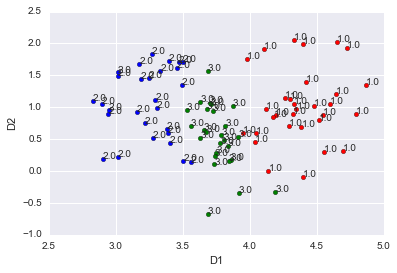

In [61]:
d_1 = []
d_2 = []

for row in data.values:
    t = np.reshape(row[:2], (2,1))
    v1 = np.dot(eig_vec_1.T, t)
    v2 = np.dot(eig_vec_2.T, t)
    l = row[-1]
    
    if l == 1:
        c = 'r'
    elif l == 2:
        c = 'b'
    else:
        c = 'g'
    plt.scatter(v1, v2, c = c)
    
    plt.annotate(
        l,
        xy=(v1, v2), xytext=(0, 0),
        textcoords='offset points')

plt.xlabel('D1')
plt.ylabel('D2')
plt.show()


As observed, there are indeed three clusters in the scatterplot; however, it does not seem to be perfectly linearly separable. I think it's a reasonable admission policy but there could be better ones.



## Question 7: Correspondence Analysis

A client of a law firm would like to visualize the number of large class-action lawsuits each year across different industries from 2011 to the first half of 2017. The correspondence analysis provides a means of displaying or summarizing a set of categorical data in two-dimensional graphical form. The data on class-action lawsuits are from annual reports of Stanford Law School’s Securities Class Action Clearinghouse. To load the data in R, you can use the following command:


### (a) 

What are the dimensions, n and p, in this dataset?

In [63]:
data = pd.read_table('http://www.stat.uchicago.edu/~lekheng/courses/331/hw3/classaction_lawsuit.csv', sep = ',').\
    set_index('Industry')

In [64]:
data.shape

(10, 7)

In [65]:
n = 10
p = 7

n = 10, p = 7
### (b) 
Show 1 is an eigenvalue of matrices D−1XD−1XT and D−1XTD−1X and that the corresponding eigenvectors are proportional to 1 = [1, . . . , 1]T.

In [66]:
# sum by n
D_r = np.diag(data.sum(1))

# sum by p
D_c = np.diag(data.sum(0))

In [67]:
Mat_1 = np.linalg.inv(D_r).dot(data).dot(np.linalg.inv(D_c)).dot(data.T)
Mat_2 = np.linalg.inv(D_c).dot(data.T).dot(np.linalg.inv(D_r)).dot(data)

In [68]:
val_1, vec_1 = np.linalg.eig(Mat_1)
val_2, vec_2 = np.linalg.eig(Mat_1)

In [69]:
print('First eigenvalue of matrix 1: ', val_1[0])
print('And its corresponding eigenvector of matrix 1: \n', vec_1[:,0])

print('\n\nFirst eigenvalue of matrix 2: ', val_2[0])
print('And its corresponding eigenvector of matrix 2: \n', vec_2[:,0])

First eigenvalue of matrix 1:  1.0
And its corresponding eigenvector of matrix 1: 
 [-0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777
 -0.31622777 -0.31622777 -0.31622777 -0.31622777]


First eigenvalue of matrix 2:  1.0
And its corresponding eigenvector of matrix 2: 
 [-0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777
 -0.31622777 -0.31622777 -0.31622777 -0.31622777]


Thus, 1 is an eigenvalue of both matrices and the corresponding eigenvectors are proportional to 1 = [1, . . . , 1]T.

### （c）

In [70]:
s = sum(data.sum())

In [71]:
a = D_r.dot(np.ones(n))
b = D_c.dot(np.ones(p))

a = np.reshape(a, (n,1))
b = np.reshape(b, (p,1))

In [72]:
part_1 = np.sqrt(s)*sp.linalg.fractional_matrix_power(D_r, -.5)
part_2 = data - (a.dot(b.T))/s
part_3 = sp.linalg.fractional_matrix_power(D_c, -.5)

Y = part_1.dot(part_2).dot(part_3)

In [73]:
U, s, V = np.linalg.svd(Y, full_matrices=True)

In [74]:
s

array([  5.73722705e+00,   3.48561973e+00,   2.53814191e+00,
         2.18628858e+00,   1.64007823e+00,   8.15471084e-01,
         4.67193599e-16])

In [75]:
U

array([[ 0.11569459, -0.46362794, -0.26833918,  0.24322243,  0.08234483,
        -0.58462755, -0.32859686, -0.03406507, -0.33744519,  0.26253611],
       [ 0.61181225, -0.02577351,  0.2859009 ,  0.10007425, -0.23850491,
         0.20644148, -0.22886299, -0.61615103, -0.04174858, -0.00115908],
       [-0.29758227,  0.23987694, -0.33741305,  0.48763066,  0.18938748,
         0.48428286, -0.07934086, -0.23924716, -0.37668545,  0.16263154],
       [-0.20879551,  0.29223812, -0.52745584, -0.24501401, -0.43707766,
        -0.19826465, -0.35104998, -0.2819384 ,  0.16976189, -0.26621341],
       [-0.12038179, -0.21425627,  0.04212567, -0.04296009, -0.03028627,
         0.34593532, -0.58030112,  0.21193083,  0.47803908,  0.45299934],
       [-0.49267533,  0.01152403,  0.41794567, -0.33953994, -0.28315819,
        -0.10267615,  0.05211679, -0.2723423 , -0.34698689,  0.42327877],
       [-0.23145585, -0.34210373, -0.0260386 , -0.30271627,  0.6244236 ,
         0.03423596, -0.02373902, -0.51045089

In [76]:
V

array([[-0.57379292, -0.07634614, -0.32402198,  0.24508385, -0.21364698,
         0.66295823,  0.12131763],
       [-0.15736402,  0.27822315, -0.10877161, -0.58436249,  0.57529803,
         0.30726707, -0.34516197],
       [-0.39099457,  0.5053886 , -0.28515102,  0.02646065,  0.17710728,
        -0.4658294 ,  0.51120477],
       [ 0.55162322, -0.13831927, -0.70252076, -0.24605507, -0.04599342,
         0.13586235,  0.31926027],
       [ 0.18354261,  0.71433212, -0.00423977, -0.10402203, -0.61084716,
         0.12420089, -0.23799803],
       [-0.13003898, -0.14205001,  0.43157291, -0.6335539 , -0.28024133,
         0.12908312,  0.52921477],
       [-0.37180007, -0.33431229, -0.34936918, -0.35355339, -0.37180007,
        -0.44556639, -0.40764748]])

Another way of expressing Y is with:

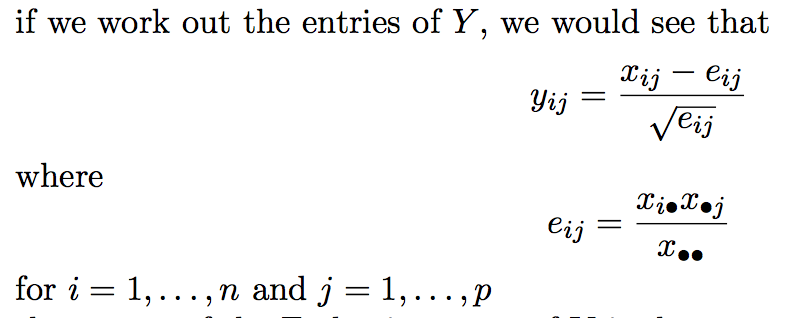

In [84]:
Image(filename='Y.png')

### (d) 
Write down the formula to compute row weight vectors and column weight vectors. How many different row weight vectors and column weight vectors are there? Report all row weight vectors and column weight vectors.

Formula: 

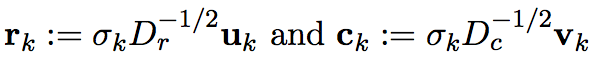

In [113]:
Image(filename='f.png')

In [78]:
np.linalg.matrix_rank(Y)
#Since there are 6 distinct singular values, there should be 6 different row weight vectors and column vectors.

6

In [79]:
# all row vectors
for x in range(6):
    r = s[x]*sp.linalg.fractional_matrix_power(D_r, -.5).dot(U[:, x])
    print('r_'+str(x+1)+' is:\n', r)

r_1 is:
 [ 0.05199017  0.1645563  -0.15149812 -0.10426444 -0.05837123 -0.23079013
 -0.12777866  0.03284617 -0.21234137  0.5399011 ]
r_2 is:
 [-0.12657729 -0.00421161  0.07419363  0.08866045 -0.06311746  0.00327974
 -0.11474293  0.25580937  0.23986961  0.30070875]
r_3 is:
 [-0.05334653  0.03401933 -0.07599341 -0.11652391  0.00903647  0.0866144
 -0.00635948  0.12261996  0.11149528 -0.22317756]
r_4 is:
 [ 0.04165022  0.01025709  0.0946012  -0.0466242  -0.00793796 -0.06061118
 -0.06368415 -0.02840618  0.25032071 -0.22317651]
r_5 is:
 [ 0.01057809 -0.01833818  0.0275622  -0.06239305 -0.00419804 -0.03791823
  0.09854441  0.09308257  0.03112694  0.10889054]
r_6 is:
 [-0.0373417   0.00789223  0.03504336 -0.01407236  0.02384182 -0.00683648
  0.00268645 -0.02147356 -0.07797879 -0.00902938]


In [80]:
# all column vectors
for x in range(6):
    r = s[x]*sp.linalg.fractional_matrix_power(D_c, -.5).dot(V[:, x])
    print('c_'+str(x+1)+' is:\n', r)

c_1 is:
 [-0.24009234 -0.07322943 -0.17410799  0.24272813  0.07679979 -0.04540396
 -0.1418918 ]
c_2 is:
 [-0.01940833  0.07865955  0.13672609 -0.03697756  0.1815939  -0.03013279
 -0.07751364]
c_3 is:
 [-0.05998069 -0.02239287 -0.05617419 -0.13675733 -0.00078484  0.06666351
 -0.05898564]
c_4 is:
 [ 0.03907898 -0.10362583  0.00449008 -0.04125868 -0.01658647 -0.08429643
 -0.05141718]
c_5 is:
 [-0.02555538  0.0765307   0.02254483 -0.00578543 -0.07306648 -0.02797144
 -0.04056204]
c_6 is:
 [ 0.039429    0.0203237  -0.02948366  0.00849734  0.00738677  0.00640614
 -0.02416945]


### (e) 
Similar to PCA, makes the following two plots:
Scatterplot of the first two row weight vectors: Does this scatterplot inform us about year or industry? What do you learn from this scatterplot?
2D biplot: What do you learn from the biplot?

In [118]:
r_1 = s[0]*sp.linalg.fractional_matrix_power(D_r, -.5).dot(U[:, 0])
r_2 = s[1]*sp.linalg.fractional_matrix_power(D_r, -.5).dot(U[:, 1])

c_1 = s[0]*sp.linalg.fractional_matrix_power(D_c, -.5).dot(V[:, 0])
c_2 = s[1]*sp.linalg.fractional_matrix_power(D_c, -.5).dot(V[:, 1])

In [119]:
industries = list(data.index)
years = list(data.columns)

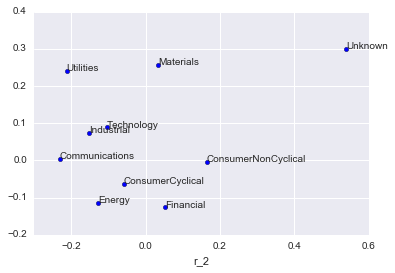

In [120]:
plt.scatter(r_1, r_2)
plt.xlabel('r_1')
plt.xlabel('r_2')
for label, x, y in zip(list(industries), r_1, r_2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(0, 0),
        textcoords='offset points')

This scatterplot inform us industries because it's from row weight vector. We learnt that `Utilitie, Materials and Unknown` seem to be outliers, while `Technology and Industrial` seem to have similar pattern over the years.

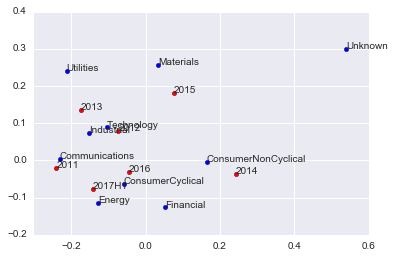

In [121]:
plt.scatter(r_1, r_2)
# plt.xlabel('r_1')
# plt.xlabel('r_2')
for label, x, y in zip(list(industries), r_1, r_2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(0, 0),
        textcoords='offset points')
    
plt.scatter(c_1, c_2, c = 'r')
# plt.xlabel('r_1')
# plt.xlabel('r_2')
for label, x, y in zip(list(years), c_1, c_2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(0, 0),
        textcoords='offset points')

As observed, `Technology, Industrial and year 2012` are very close together. Maybe this indicates that Industial and technology case have very similar numbers in year 2012.

### (f)
Write down the formula to calculate the Frobenius norm of Y . Compute the Frobenius
norm of Y . What is the relationship between the sum of squares of the singular values and
the Frobenius norm of Y ?

In [122]:
np.linalg.norm(Y, ord = 'fro')**2

59.642190886299886

In [123]:
sum(np.square(s))

59.642190886299886

We observe that squared Frobenius norm of Y is the same as sum of squares of singular values.
### (g) 
Report the percentage of original variance that each dimension in the row/column weight
vectors explain? How many singular values are needed to effectively summarize at least 90% of the variability in the data?

In [124]:
t = 0
f = True
for i in range(7):
    prop = s[i]/sum(s)
    print('Proportion of variance explained by '+ str(i+1)+'th row/column vectors is:', prop)
    t += prop
    if t >= 0.9 and f:
        f = False
        print('We need '+ str(i+1)+' to reach 90%')
    

Proportion of variance explained by 1th row/column vectors is: 0.349770633674
Proportion of variance explained by 2th row/column vectors is: 0.212501163216
Proportion of variance explained by 3th row/column vectors is: 0.154738081154
Proportion of variance explained by 4th row/column vectors is: 0.13328730714
Proportion of variance explained by 5th row/column vectors is: 0.0999875367851
We need 5 to reach 90%
Proportion of variance explained by 6th row/column vectors is: 0.0497152780316
Proportion of variance explained by 7th row/column vectors is: 2.84825055276e-17


## Question 8: Multidimensional Scaling

### (a) 
Report mean returns and standard deviation of five industries of your choice. Out of all 30 industries, which industry performs the best on average, which industry is the most volatile?

In [184]:
data = pd.read_table('http://www.stat.uchicago.edu/~lekheng/courses/331/hw3/FamaFrench30.csv', sep = ',')
industries = data.columns[1:]

In [126]:
data.set_index('date').describe().T.sort_values(by = 'mean', ascending = False)[:10][['mean', 'std']]

,mean,std
Servs,1.214922,8.351969
Beer,1.210146,7.216212
Smoke,1.173963,5.785794
ElcEq,1.171507,7.595971
Carry,1.141744,7.587949
Games,1.132055,8.937234
BusEq,1.129306,6.766371
Autos,1.092073,7.973370
Hlth,1.088420,5.573595
Chems,1.070256,6.309116


As observed, the five industries of my choice are `Servs, Beer, Smoke, ElcEq, Carry`, and their mean and std are shown in the table above. Top 10 industries with highest mean are also shown in the table above.

In [127]:
data.set_index('date').describe().T.sort_values(by = 'mean')[:10][['mean', 'std']]

,mean,std
Other,0.802877,6.777299
Whlsl,0.825461,7.340007
Telcm,0.858703,4.593144
Util,0.883087,5.527677
Mines,0.908110,7.303744
Steel,0.915142,8.445446
Books,0.917205,7.170426
Clths,0.922438,6.093808
Hshld,0.925434,5.823733
Trans,0.931626,7.081260


If we interpret 'volatile' as having the lowest return on average, then the top 10 industries that are most volatile are shown above. In fact, we could observe that the difference in returns between top 10 and lowest 10 industries are not too much

In [128]:
data.set_index('date').describe().T.sort_values(by = 'std', ascending = False)[:10][['mean', 'std']]

,mean,std
Coal,1.046320,10.838927
Games,1.132055,8.937234
Steel,0.915142,8.445446
Servs,1.214922,8.351969
Autos,1.092073,7.973370
Txtls,1.009653,7.644116
ElcEq,1.171507,7.595971
Carry,1.141744,7.587949
Whlsl,0.825461,7.340007
Mines,0.908110,7.303744


If we interpret 'volatile' as having the highest std, then the top 10 industries that are most volatile are shown above.

### (b) 
Let Rti be the return of industry i at time t. Write a formula to compute the distance between two industries. Denote what each subscript/superscript means and specify dimension of each subscript/superscript (i.e., explicitly stating what do you sum to). Write a code to compute distance and report the distance of the following pair of industries:

• Autos – ElecEq 

• Autos – Trans 

• Autos – Oil

In [129]:
def get_distance (a,b):
   return np.linalg.norm(data[a] - data[b])

In [130]:
get_distance('Autos', 'ElcEq')

167.75230609443199

In [131]:
get_distance('Autos', 'Trans')

182.62838908559644

In [132]:
get_distance('Autos', 'Oil  ')

216.60601376693123

### (c) 
Do you need to demean the data to compute distance matrix? Why?

We do not need to demean the data because, as shown in class, the EMD of X and the EDM of $X-1C^T$ are always the same for any $C^T$. 

### (d) 
Report the distance matrix of all industries. To conveniently compute distance, R has a
built in distance matrix command dist.

In [185]:
M = data.set_index('date')
M = scale(M, with_std = False).T
edm = euclidean_distances(M, M)

In [186]:
edm

array([[   0.        ,  170.86775623,  145.48116453,  215.2560449 ,
         162.9419713 ,  116.02584322,  156.271283  ,  116.9036698 ,
         141.20848757,  185.73597232,  145.94166711,  216.36325484,
         165.45044548,  169.61290033,  198.51482715,  179.30644692,
         210.92042286,  311.28971106,  164.78612107,  132.07716567,
         129.20255931,  254.8326837 ,  173.94471862,  126.60430677,
         165.94305966,  176.00389368,  117.39750795,  146.72328375,
         136.47566611,  155.37332491],
       [ 170.86775623,    0.        ,  228.07107191,  230.21801735,
         213.68986811,  183.43824161,  219.79281869,  186.26013701,
         198.47197784,  216.6391759 ,  185.52001764,  250.464516  ,
         206.54988802,  214.89644407,  237.11063206,  214.62240308,
         251.68688198,  333.78159126,  222.23188497,  200.42625559,
         208.28494838,  296.68159383,  223.42879274,  193.55875911,
         209.29749641,  197.54153453,  185.98144223,  195.33678416,
         

### (e)

Multidimensional scaling: With the distance matrix in hand, you are now ready to perform multidimensional scaling to visualize this data. The end goal is to plot the first two dimen- sions after multidimensional scaling.

- To perform MDS, you first need Euclidean distance matrix (EDM) from the previous part. 
- Then, you would perform the following steps
    - Step 1: Form Gram matrix G from EDM. [Handout 9, equation 7.6] 
    - Step 2: Perform EVD on G and recover X using X = Q Λ1/2.
    
Report the result by plotting the first two dimensions after multidimensional scaling with corresponding industry label for each data point. Does this plot have to be unique? Why?

In [136]:
mds = MDS(n_components=2, dissimilarity="precomputed")
pos = mds.fit(edm).embedding_

d1 = pos[:,0]
d2 = pos[:,1]

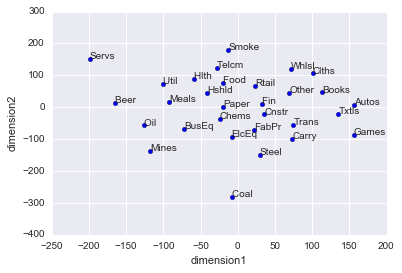

In [137]:
plt.scatter(d1, d2)
plt.xlabel('dimension1')
plt.ylabel('dimension2')
# plt.annotate(, pc_1, pc_2)

for label, x, y in zip(list(industries), d1, d2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(0, 0),
        textcoords='offset points')

The plotting does not need to be unique since it only perserves the distance between each pair of industries, so it may be arbitrarily translated, rotated, and reflected, since these transformations do not change the pairwise distances.

### (f)

Interpret the results. What does closer/further in distance mean in this setting? Which industry tends to co-move with Games industry the most? List three industries whose returns tend to move on its own.

Closer/further in distance in thie plot means two indisturies have similar/different return in the 1095 months period. The industry that co-move with Game industry the most is Textiles industry. The three industries whose returns tend to move on its own are Service, Coal and Games.

### (g)
(Optional): What is your advice for an investor who put most of his money on stocks in Telecom? [Think about diversification]

In [138]:
data['Telcm'].describe()

count    1095.000000
mean        0.858703
std         4.593144
min       -21.560000
25%        -1.410000
50%         0.900000
75%         3.240000
max        28.170000
Name: Telcm, dtype: float64

In [139]:
data.set_index('date').describe().T.sort_values(by = 'std', ascending = True)[:5][['mean', 'std']]

,mean,std
Telcm,0.858703,4.593144
Food,0.975370,4.743400
Util,0.883087,5.527677
Hlth,1.088420,5.573595
Smoke,1.173963,5.785794


As we could observe, Telecom industry has the 3rd lowest average across all industries; however, it has the smallest standard deviation. Thus, it's not the most profitable choice but it seems to be a very safe choice. I would suggest the investor to invest some in Telecom industry and some in more profitable but also relatively save industries like Smoke and Health. Depending on how much risk he would like to take, he could also invest in industries with highest averaged returns like service to diversify his porfolio.